# Aceleradev Codenation - Semana 3
## Túlio Vieira de Souza | Data Scientist

dados : https://www.kaggle.com/rubenssjr/brasilian-houses-to-rent

Colunas 

- city : Cidade onde o imóvel está localizada / City where the property is located
- area : Area do imovel / Property area
- rooms: Numero de quartos/ Quantity of rooms
- bathroom: Numero de banheiros / Quantity of bathroom
- parking spaces : Numero de vagas / Quantity of parking spaces
- floor : Andar / Floor
- animal : Aceita animais? / Acept animals?
- furniture : Mobilhada? / Furniture?
- hoa (RS): Valor do condomínio / Homeowners association tax 
- rent amount (RS) : Valor do Aluguel (/) Rent amount 
- property tax (RS) : IPTU (/) Property tax
- fire insurance (RS) : Seguro Incendio / Fire Insurance
- total (RS) : Valor total / Total

### Importando os pacotes

In [1]:
import matplotlib.pyplot as plt

%matplotlib inline
import pandas as pd

In [2]:
# Carregando os dados para análise
df = pd.read_csv('houses_to_rent_v2.csv')

In [3]:
# Mostrando os 5 primeiros registros
df.head(5)

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [4]:
# Análisando os tipos de dados das variáveis, se estão declaradas com seus tipos corretamente
df.dtypes

city                   object
area                    int64
rooms                   int64
bathroom                int64
parking spaces          int64
floor                  object
animal                 object
furniture              object
hoa (R$)                int64
rent amount (R$)        int64
property tax (R$)       int64
fire insurance (R$)     int64
total (R$)              int64
dtype: object

In [5]:
# Verificando dados faltantes
df.isna().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [6]:
# Verificando informações gerais: quais os indices, quantidade de variáveis(colunas), tipos de dados das variáveis, 
# quantidade de registros(linhas), valores nao nulos, quantidade de memória utilizada
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
city                   10692 non-null object
area                   10692 non-null int64
rooms                  10692 non-null int64
bathroom               10692 non-null int64
parking spaces         10692 non-null int64
floor                  10692 non-null object
animal                 10692 non-null object
furniture              10692 non-null object
hoa (R$)               10692 non-null int64
rent amount (R$)       10692 non-null int64
property tax (R$)      10692 non-null int64
fire insurance (R$)    10692 non-null int64
total (R$)             10692 non-null int64
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


# Problema : Explorar o valor do aluguel (rent amount RS)

## Estatística univariada

In [7]:
# Renomear a variável(coluna) 'rent anount (R$)'
df.rename(columns = {'rent amount (R$)' : 'valor_aluguel'}, inplace = True) # inplace = True já altera diretamente no DataFrame original

In [8]:
# Verificar a média do valor_aluguel => (soma dos valores) / (contagem dos valores)
df['valor_aluguel'].mean()

3896.247194163861

In [9]:
# Verificar a mediana do valor_aluguel => valor que divide os dados em duas partes de conjuntos iguais
# Quando veriricamos que a media está muito diferente da mediana constatamos a presença de outliers(valores que apresentam grande distanciamento dos demais)
df['valor_aluguel'].median()

2661.0

In [10]:
# Verificar o desvio padrão, se o valor_aluguel é muito esparço => medida de dispersão em torno da media de uma variável aleatória
df['valor_aluguel'].std()

3408.5455176710675

In [11]:
# Fazer uma análise mais descritiva: contagem de registros, media, desvio padrao, valor minimo, valor em 25% dos dados(Q1), valor em 50% dos dados(mediana),
# valor em 75% dos dados(Q3), valor maximo
# Podemos constatar a presença de outliers, a discrepancia entre o dado encontrado em 75%(5000,00) e o dado encontrado no valor maximo(45000,00) 
df['valor_aluguel'].describe()

count    10692.000000
mean      3896.247194
std       3408.545518
min        450.000000
25%       1530.000000
50%       2661.000000
75%       5000.000000
max      45000.000000
Name: valor_aluguel, dtype: float64

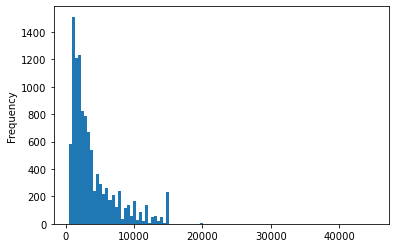

In [12]:
# Plotando um Histograma para análisar a distrubuição dos dados valor_aluguel
# Podemos analisar que a maioria dos valores estão entre 450,00 e 5000,00, e valores outliers que fogem do padrão acima de 5000,00 até 45000,00
df['valor_aluguel'].plot(kind = 'hist', bins= 100)

In [13]:
#skewness positive skew
df.valor_aluguel.skew()

1.8388773035440982

In [14]:
#kurtose - leptocurtica
df.valor_aluguel.kurtosis()


4.624228179818687

## Exploracao multivariáveis

### Perguntas
 
- Qual a cidade com a média de aluguel mais cara? 
- Quantos banheiros existem nas residencias com alugueis mais altos? 
- Os imóveis mais caros aceitam animal? 
- Os imóveis mais caros são mobiliados? 

In [15]:
#Qual a cidade com a média de aluguel mais alta? 

df.groupby('city')['valor_aluguel'].median().reset_index().sort_values('valor_aluguel', ascending = False)

,city,valor_aluguel
4,São Paulo,3400
0,Belo Horizonte,2300
3,Rio de Janeiro,2300
2,Porto Alegre,1650
1,Campinas,1500


In [16]:
#Quantos banheiros existem em média nas residencias com alugueis mais altos? 
## definicao: algueis mais altos são valores acima de 5000

df['aluguel_alto'] = ['Alto' if x > 5000 else 'Baixo' for x in df['valor_aluguel']]


In [17]:
df.groupby('aluguel_alto')['bathroom'].mean()

aluguel_alto
Alto     3.729027
Baixo    1.772108
Name: bathroom, dtype: float64

### Hipóteses

- São Paulo é a cidade com o aluguel mais caro.
- Quanto mais banheiros em um imovel maior o valor do aluguel.
- Os imoveis com mobilia tem o aluguel mais alto. 

In [18]:
df[['valor_aluguel', 'bathroom']].corr(method = 'spearman')

,valor_aluguel,bathroom
valor_aluguel,1.00000,0.71589
bathroom,0.71589,1.00000


In [19]:
aux = pd.DataFrame({'colunas' : df.columns, 'tipos' : df.dtypes})

In [20]:
lista = list(aux[aux['tipos'] == 'int64']['colunas'])

In [21]:
for coluna in lista:
    print(coluna)
    print(df[['valor_aluguel', coluna]].corr(method = 'spearman'))

area
               valor_aluguel      area
valor_aluguel       1.000000  0.728095
area                0.728095  1.000000
rooms
               valor_aluguel     rooms
valor_aluguel       1.000000  0.600969
rooms               0.600969  1.000000
bathroom
               valor_aluguel  bathroom
valor_aluguel        1.00000   0.71589
bathroom             0.71589   1.00000
parking spaces
                valor_aluguel  parking spaces
valor_aluguel        1.000000        0.620175
parking spaces       0.620175        1.000000
hoa (R$)
               valor_aluguel  hoa (R$)
valor_aluguel       1.000000  0.355785
hoa (R$)            0.355785  1.000000
valor_aluguel
               valor_aluguel  valor_aluguel
valor_aluguel            1.0            1.0
valor_aluguel            1.0            1.0
property tax (R$)
                   valor_aluguel  property tax (R$)
valor_aluguel            1.00000            0.65923
property tax (R$)        0.65923            1.00000
fire insurance (R$)
          

## Visualização de dados